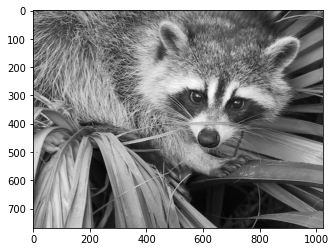

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import numpy as np
from math import sqrt
from PIL import Image

img = Image.open('raccoon.png')
plt.imshow(img, cmap="gray")


In [6]:
def kmeans(img, k):
    image_array = np.array(img)
    image_array = np.ndarray.flatten(image_array)

    # initialize centroids
    old_centroids = np.zeros(k)
    centroids = np.random.choice(image_array,k)

    while old_centroids.all() != centroids.all():

        # Cluster by minimum distance
        c = np.zeros(k)
        A = np.zeros((len(image_array),k))

        for i in range(k):
            c[i] = centroids[i]
    
            for j in range(len(image_array)):
                A[j,i] = np.sqrt((image_array[j]-c[i])**2)      

        old_centroids = centroids
        B=np.argmin(A,axis=1)
        closest_centroids=np.array(B)
    
        #update centroids
        for u in range(centroids.shape[0]):
            centroids[u] = np.array(image_array[closest_centroids==u].mean(axis=0))

                

    recovered_image_array = np.zeros(len(image_array))

    for p in range(len(image_array)):
        for l in range(k):
            if closest_centroids[p] == l:
                recovered_image_array[p] = centroids[l]

    recovered_image_array = np.reshape(recovered_image_array,(768,1024))
    return recovered_image_array, centroids

[[151. 151. 151. ... 151. 151. 151.]
 [ 59. 151. 151. ... 151. 151. 151.]
 [ 59.  59. 151. ... 151. 151. 151.]
 ...
 [ 59. 151. 151. ... 151. 151. 151.]
 [ 59. 151. 151. ... 151. 151. 151.]
 [ 59. 151. 151. ... 151. 151. 151.]]
[ 59 151]


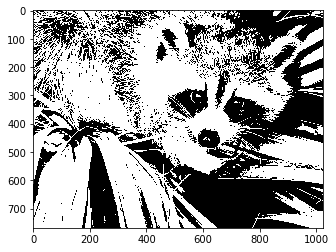

In [7]:
k=2
recovered_image_array, centroids = kmeans(img,k)
print(recovered_image_array)
print(centroids)
plt.imshow(recovered_image_array, interpolation ='nearest', cmap="gray")
plt.show()

[[101. 162. 162. ... 101. 162. 162.]
 [101. 101. 162. ... 101. 162. 162.]
 [ 65. 101. 101. ... 101. 162. 162.]
 ...
 [101. 101. 101. ... 162. 162. 162.]
 [101. 101. 101. ... 162. 162. 162.]
 [101. 101. 101. ... 162. 162. 162.]]
[162  65  24 101]


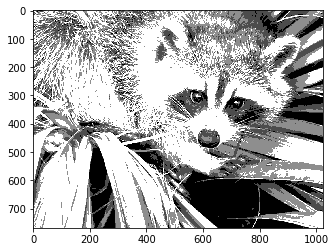

In [8]:
k=4
recovered_image_array, centroids = kmeans(img,k)
print(recovered_image_array)
print(centroids)
plt.imshow(recovered_image_array, interpolation ='nearest', cmap='gray')
plt.show()

When I runned the code multiple times, k=2 models show a pretty much variation each iterations. There are more gap between centroids values each time than k = 4 models.
However, k=4 model shows more stabilized centroids value in ev